<a href="https://colab.research.google.com/github/Jvab1609/FCMP_5-sem/blob/main/Intelig%C3%AAncia%20Artificial/Regress%C3%A3o%20Linear%20Simples/exercise_com_genero_simple_linear_regression_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Simple Linear Regression

## 1. Exploring the Data

Dataset retirado de https://www.kaggle.com/datasets/mustafaali96/weight-height

### 1.1. Importing the Dataset

In [81]:
df = pd.read_csv('/content/sample_data/weight-height.csv')

In [82]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [83]:
df.drop_duplicates()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [84]:
df.head() # mostra as 5 primeiras linhas

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [85]:
df.shape # Mostra o número de linhas e colunas do dataframe

(10000, 3)

### 1.2. Basic Information about the Dataset

In [86]:
print(f'This dataset has {df.shape[0]} observations/samples/rows and {df.shape[1]} attributes/features/colunas')

This dataset has 10000 observations/samples/rows and 3 attributes/features/colunas


In [87]:
df.info() # Saber se o dataframe está balanceado (mesmo número de linhas em cada atributo) ou não; tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### 1.3. Descriptive Statistics

In [88]:
df.describe()
# std = desvio padrão
# mean = média

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: title={'center': 'Boxplot - Weight (Pounds)'}, ylabel='Weight (Pounds)'>

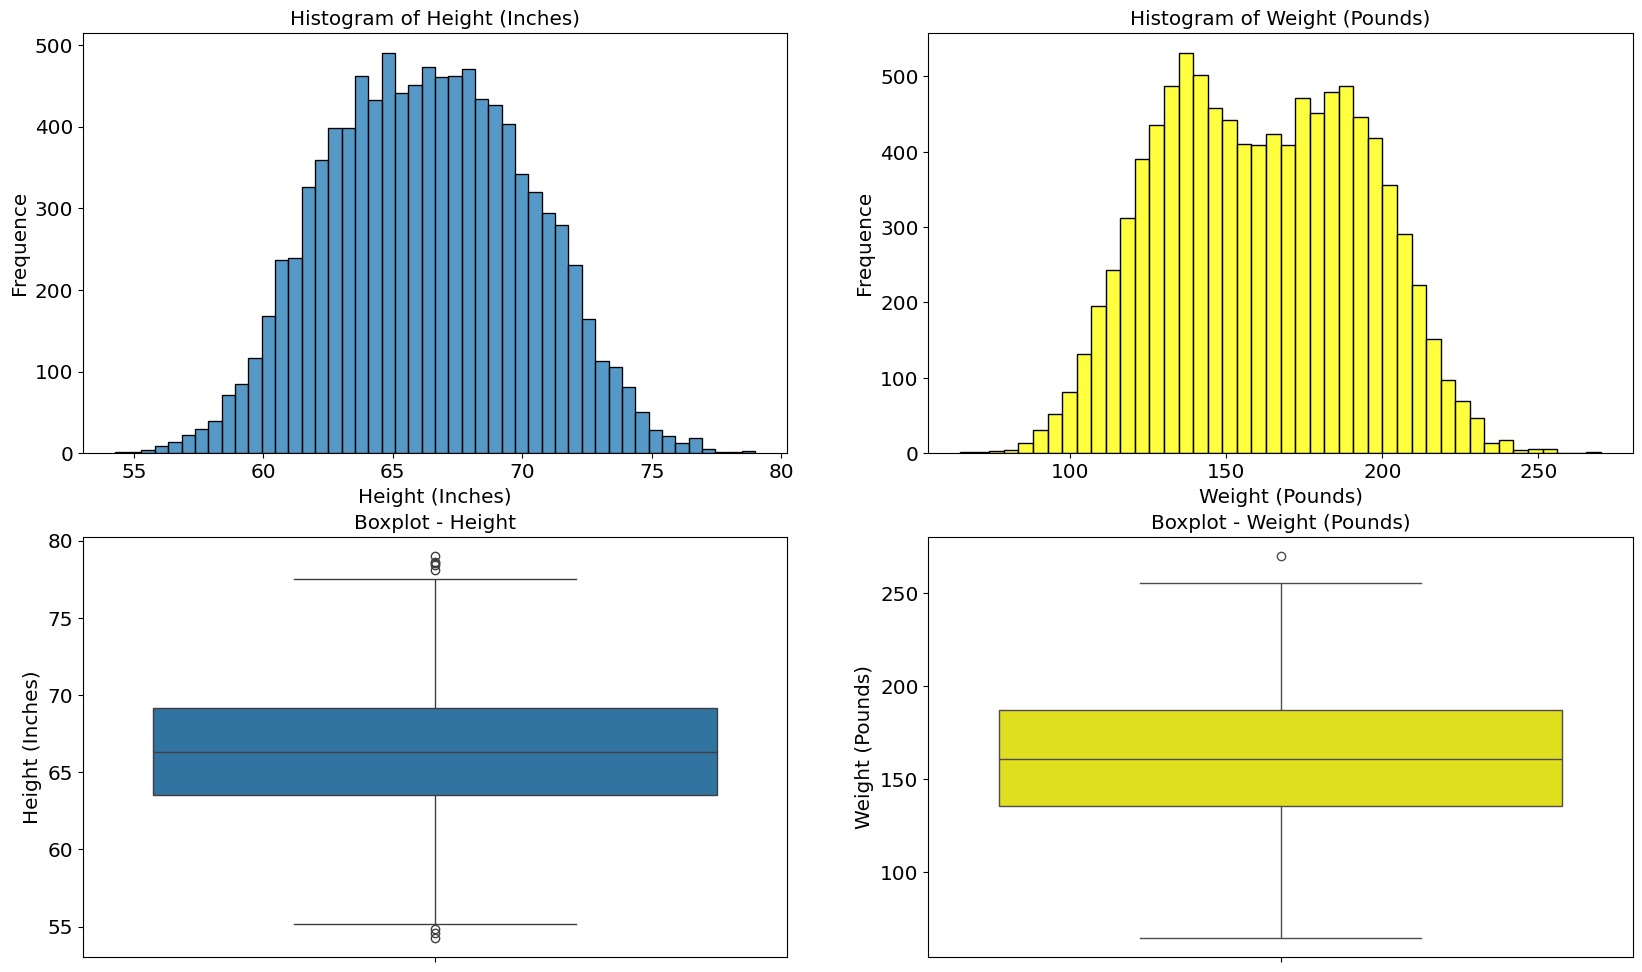

In [89]:
fig = plt.figure(figsize=(20, 12))

axis_1 = fig.add_subplot(2, 2, 1)
axis_1.set_title('Histogram of Height (Inches)')
axis_1.set_xlabel('Height (Inches)')
axis_1.set_ylabel('Frequence')
sns.histplot(data=df, x='Height', ax=axis_1)

axis_2 = fig.add_subplot(2, 2, 2)
axis_2.set_title('Histogram of Weight (Pounds)')
axis_2.set_xlabel('Weight (Pounds)')
axis_2.set_ylabel('Frequence')
sns.histplot(data=df, x='Weight', ax=axis_2, color="yellow")

axis_3 = fig.add_subplot(2, 2, 3)
axis_3.set_title('Boxplot - Height')
axis_3.set_ylabel('Height (Inches)')
sns.boxplot(data=df, y='Height', orient='v', ax=axis_3)

axis_4 = fig.add_subplot(2, 2, 4)
axis_4.set_title('Boxplot - Weight (Pounds)')
axis_4.set_ylabel('Weight (Pounds)')
sns.boxplot(data=df, y='Weight', orient='v', color="yellow", ax=axis_4)

### 1.4 Correlation Matrix

The **correlation coefficient** measures the _linear association_ between two variables. Its value ranges from **_-1_** (perfect negative association) and **_+1_** (perfect positive association).
<img src="imgs/correlation_coefficient.png" width="70%" />

Source: https://dataz4s.com/statistics/correlation-coefficient/

<Axes: xlabel='Height', ylabel='Weight'>

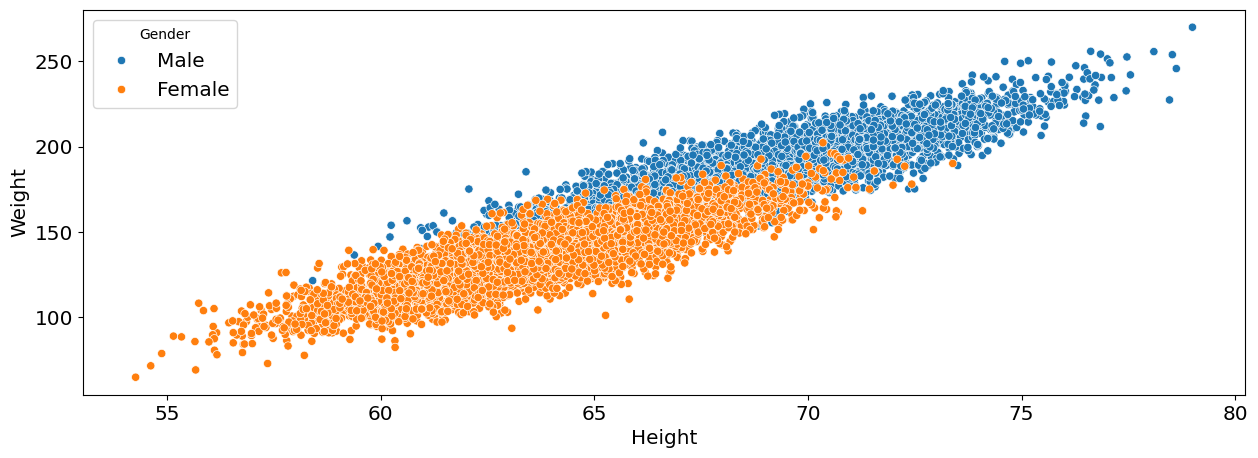

In [90]:
sns.scatterplot(data=df, x='Height', y='Weight', hue="Gender") # Permite visualizar a relação entre os meus dados
# Isso me possibilita decidir qual o melhor modelo

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le = LabelEncoder()
df_encoded = df
df_encoded['Gender'] = df_encoded[df.columns[:1]].apply(le.fit_transform)
# Fazendo label encoding para conseguir trabalhar com o gênero posteriormente

In [93]:
df_encoded

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [94]:
df_encoded.corr() # Mostra o grau de correlação entre os dados

,Gender,Height,Weight
Gender,1.000000,0.691072,0.796723
Height,0.691072,1.000000,0.924756
Weight,0.796723,0.924756,1.000000


## 2. Dependent Variable (y) vs Independent Variables

### `pairplot`

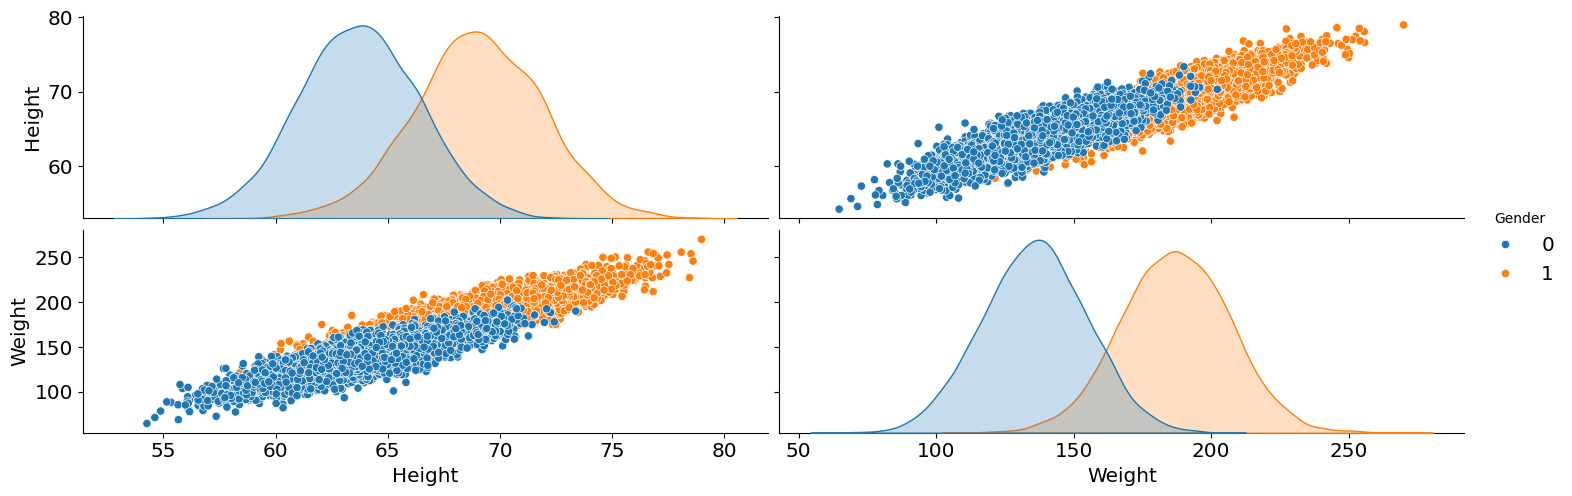

In [95]:
sns.pairplot(df, aspect=3, hue="Gender") # junta o gráfico de correlação e o de histograma

### `jointplot`

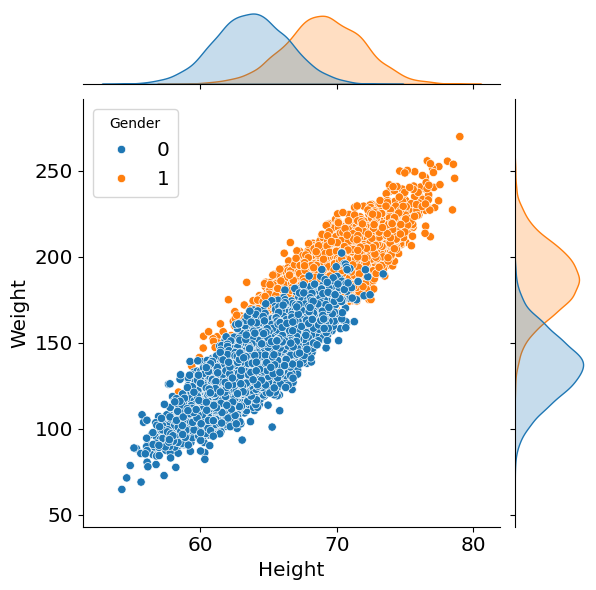

In [96]:
sns.jointplot(data=df, x='Height', y='Weight', hue="Gender")

### `jointplot` with the estimated regression line

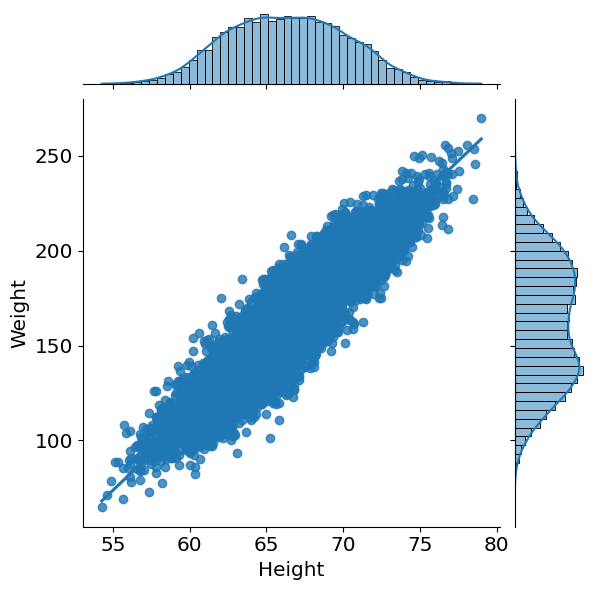

In [97]:
sns.jointplot(data=df, x='Height', y='Weight', kind='reg')

### `lmplot`
Plots the regression line between two variables together with their respective dispersions.

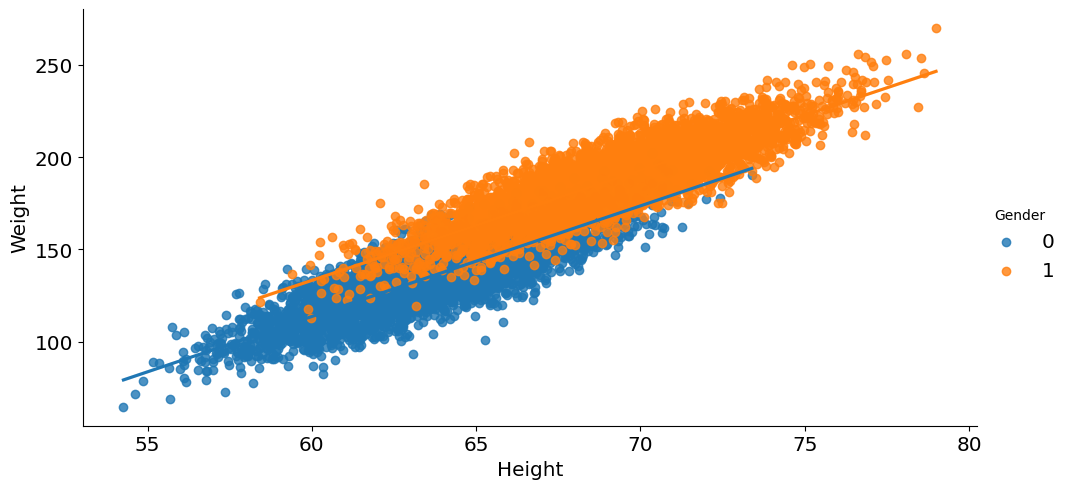

In [98]:
sns.lmplot(data=df, x='Height', y='Weight', aspect=2, hue="Gender")

## 3. Estimating a Linear Regressor


### 3.1. Extracting the independent and dependent variables

In [99]:
df_encoded.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


#### Creating a DataFrame to store the independent/explanatory variables: Feature Matrix (X)
NB: we could use a numpy array instead.

In [100]:
X = df_encoded[['Gender', 'Height']] # 2 colchetes para pegar como dataframe
X

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
9995,0,66.172652
9996,0,67.067155
9997,0,63.867992
9998,0,69.034243


In [101]:
X_npy = X.values # Converter de DataFrame para array numpy, p/ não dar erro nos cálculos
X_npy

array([[ 1.        , 73.84701702],
       [ 1.        , 68.78190405],
       [ 1.        , 74.11010539],
       ...,
       [ 0.        , 63.86799221],
       [ 0.        , 69.03424313],
       [ 0.        , 61.94424588]])

#### Creating a Series to store the dependent variable (y)

In [102]:
y = df['Weight']
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


In [103]:
y_npy = y.values
y_npy

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

### 3.2 Splitting the dataset into Training Set and Test Set
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) # dividir os dados entre treino e teste para a IA

#### Checking training and test set sizes

In [106]:
print(f'X_train.shape = {X_train.shape}')
print(f'Y_train.shape = {y_train.shape}')

X_train.shape = (8000, 2)
Y_train.shape = (8000,)


In [107]:
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_test.shape = (2000, 2)
y_test.shape = (2000,)


### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
reg = LinearRegression()
reg

LinearRegression()

In [110]:
reg.fit(X_train, y_train) # ajuste à divisão de treino e teste (nesse contexto, significa treinar)

LinearRegression()

In [111]:
reg.intercept_ # theta_0 -> coeficiente linear

np.float64(-244.69356793639193)

In [112]:
reg.coef_ # theta_1 -> coeficiente angular

array([19.34720343,  5.97314123])

A partir do conjunto de treinamento estabelecido, nosso plano é então: <br/>
**w(x,y) = -244.69356793639193 + 19.34720343 * x 5.97314123 * y **
Sendo x o gênero, e y a altura

Para uma altura de 0, o peso seria de -349.7878205824451 libras. E a cada polegada de altura, a pessoa ganha 7.70218561 libras

## 3.4 Coefficient of determination (R²) of the linear model estimated with the Training Set

The coefficient of determination (R²) is a summary measure that tells you _how well the regression line fits the data_. <br/>
The coefficient of determination (R²) measures how well a _statistical model_ predicts an _outcome_. The _outcome_ is represented by the _model’s dependent variable_. <br/>
It is a value (generally) between 0 and 1.

It represents the _proportion of total variability_ of the $y$-value that is accounted for by the **independent variable $x$**.

Eg R² = 0.8234 means that the linear model explains 82.34% of the variance of the dependent variable from the regressors (independent variables) included in that linear model.

Broadly speaking:

| **Coefficient of determination (R²)** | **Interpretation**                            |
|---------------------------------------|-----------------------------------------------|
| 0                                     | The model **does not** predict the outcome.   |
| Between 0 and 1                       | The model **partially** predicts the outcome. |
| 1                                     | The model **perfectly** predicts the outcome. |

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2}$$

In [113]:
print(f'R² = {reg.score(X_train, y_train)}')
# se chegar acima de 95% de acurácia, tem algo de errado!
# É como se o modelo estivesse "decorando a informação"

R² = 0.9025904849221458


## 4. Predicting Salaries for Test Samples

### 4.1. Prediction

In [114]:
X_test

,Gender,Height
6252,0,68.687232
4684,1,68.829334
1731,1,66.398128
4742,1,71.929340
4521,1,67.042903
...,...,...
6412,0,65.748601
8285,0,60.731857
7853,0,62.188933
1095,1,67.068304


In [115]:
y_test

,Weight
6252,173.115813
4684,195.162042
1731,170.217451
4742,215.049660
4521,182.721452
...,...
6412,142.067438
8285,119.967881
7853,125.179380
1095,187.573494


In [116]:
y_pred = reg.predict(X_test)
y_pred

array([165.58497097, 185.78096721, 171.25903401, ..., 126.76971077,
       175.2620878 , 105.52795239])

In [117]:
type(y_pred)

numpy.ndarray

In [118]:
y_pred.shape

(2000,)

In [119]:
results = pd.DataFrame({
    'Height (Inches)': X_test['Height'],
    'Weight (Prediction)': y_pred.round(2),
    'Weight (True)': y_test.round(2),
    'Erro (Residual)': (y_test - y_pred).round(2),
    'Erro (Absolute)': abs(y_test - y_pred).round(2)
})
# montando um dataframe para exibir meus resultados de forma mais elegante
results

,Height (Inches),Weight (Prediction),Weight (True),Erro (Residual),Erro (Absolute)
6252,68.687232,165.58,173.12,7.53,7.53
4684,68.829334,185.78,195.16,9.38,9.38
1731,66.398128,171.26,170.22,-1.04,1.04
4742,71.929340,204.30,215.05,10.75,10.75
4521,67.042903,175.11,182.72,7.61,7.61
...,...,...,...,...,...
6412,65.748601,148.03,142.07,-5.96,5.96
8285,60.731857,118.07,119.97,1.90,1.90
7853,62.188933,126.77,125.18,-1.59,1.59
1095,67.068304,175.26,187.57,12.31,12.31


The **residuals** inform how far the predictions are from the linear model.

In [120]:
results.describe() # informações estatísticas

,Height (Inches),Weight (Prediction),Weight (True),Erro (Residual),Erro (Absolute)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,66.399073,161.706990,161.894780,0.187545,7.962195
std,3.855328,30.634625,32.370834,10.062821,6.153640
min,55.739737,88.250000,72.750000,-44.150000,0.010000
25%,63.425150,134.747500,134.792500,-6.382500,3.160000
50%,66.396236,161.730000,162.605000,-0.065000,6.660000
75%,69.180671,187.130000,187.555000,6.927500,11.360000
max,78.095867,241.130000,255.690000,32.380000,44.150000


### 4.2. Visualizing the samples with the Linear Models

In [121]:
regression_line_x = X['Height']
regression_line_y = reg.predict(X)
regression_line_y

array([215.7522979 , 185.49766275, 217.32376192, ..., 136.79896994,
       167.65771632, 125.30816138])

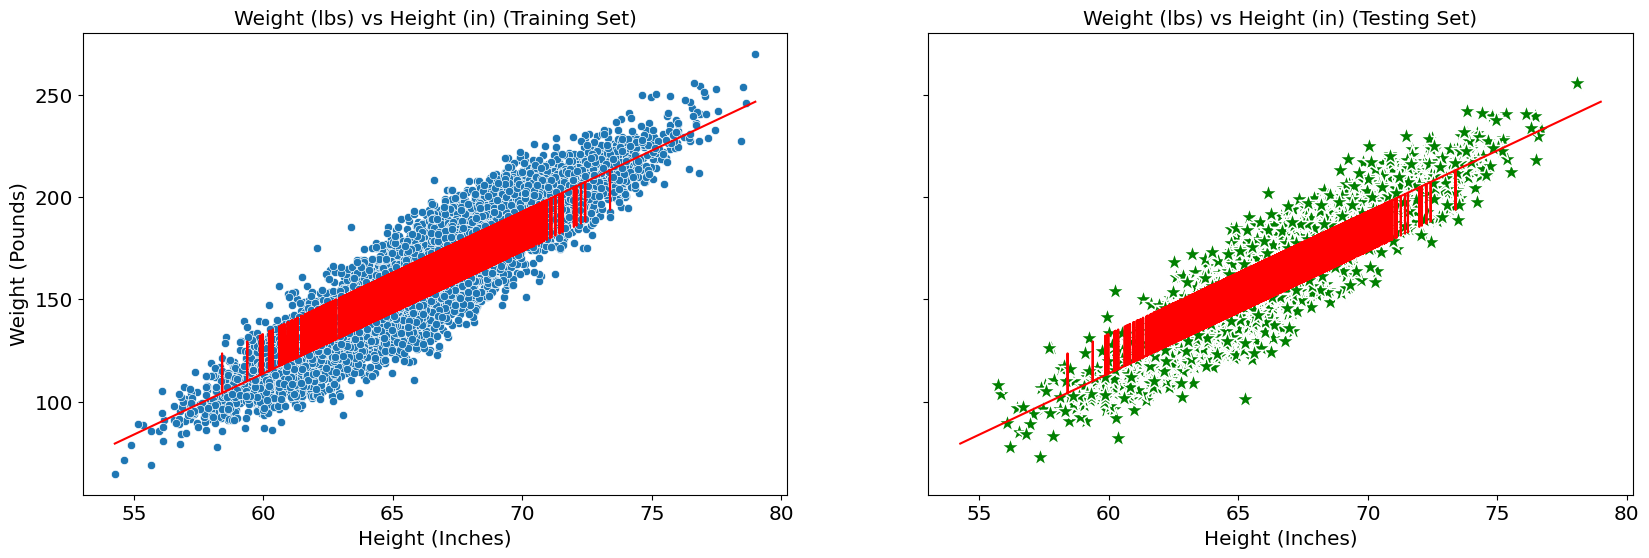

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X['Height']
regression_line_y = reg.predict(X)

sns.scatterplot(x=X_train['Height'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Weight (lbs) vs Height (in) (Training Set)')
axs[0].set_xlabel('Height (Inches)')
axs[0].set_ylabel('Weight (Pounds)')

sns.scatterplot(x=X_test['Height'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Weight (lbs) vs Height (in) (Testing Set)')
axs[1].set_xlabel('Height (Inches)')
axs[1].set_ylabel('Weight (Pounds)')

display()

In [123]:
X_labeled = X.copy()
X_labeled['Label'] = 'Train'
X_labeled
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

,Gender,Height,Label
0,1,73.847017,Test
1,1,68.781904,Train
2,1,74.110105,Train
3,1,71.730978,Test
4,1,69.881796,Train
...,...,...,...
9995,0,66.172652,Train
9996,0,67.067155,Train
9997,0,63.867992,Train
9998,0,69.034243,Test


Text(0, 0.5, 'Weight (Pounds)')

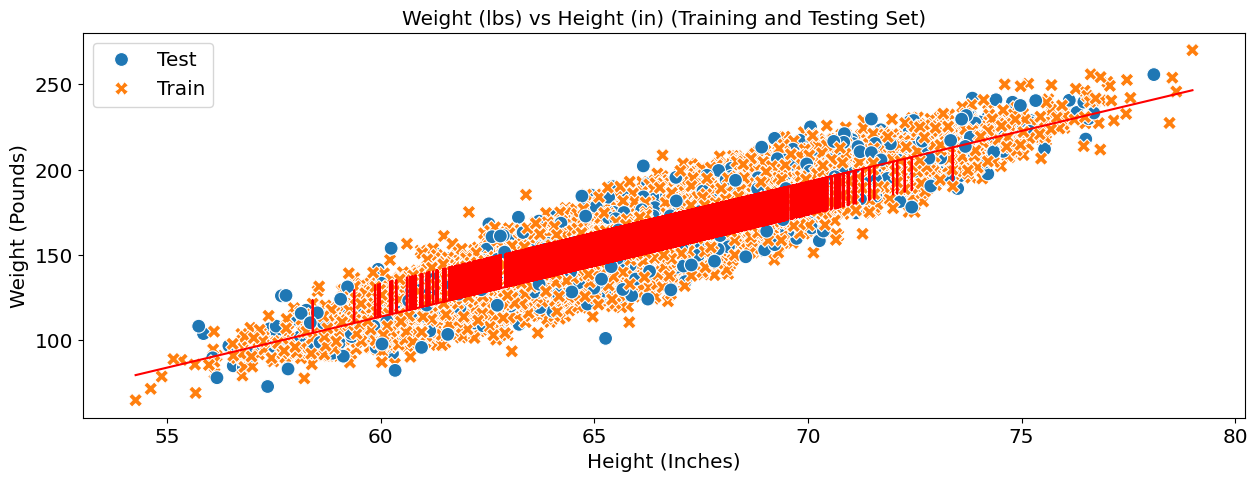

In [124]:
sns.scatterplot(data=X_labeled, x='Height', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Weight (lbs) vs Height (in) (Training and Testing Set)')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')

A reta da regressão linear, nesse gráfico, ficou "estranha". Como a função leva em conta duas variáveis, podemos tentar plotar como uma superfície

In [125]:
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


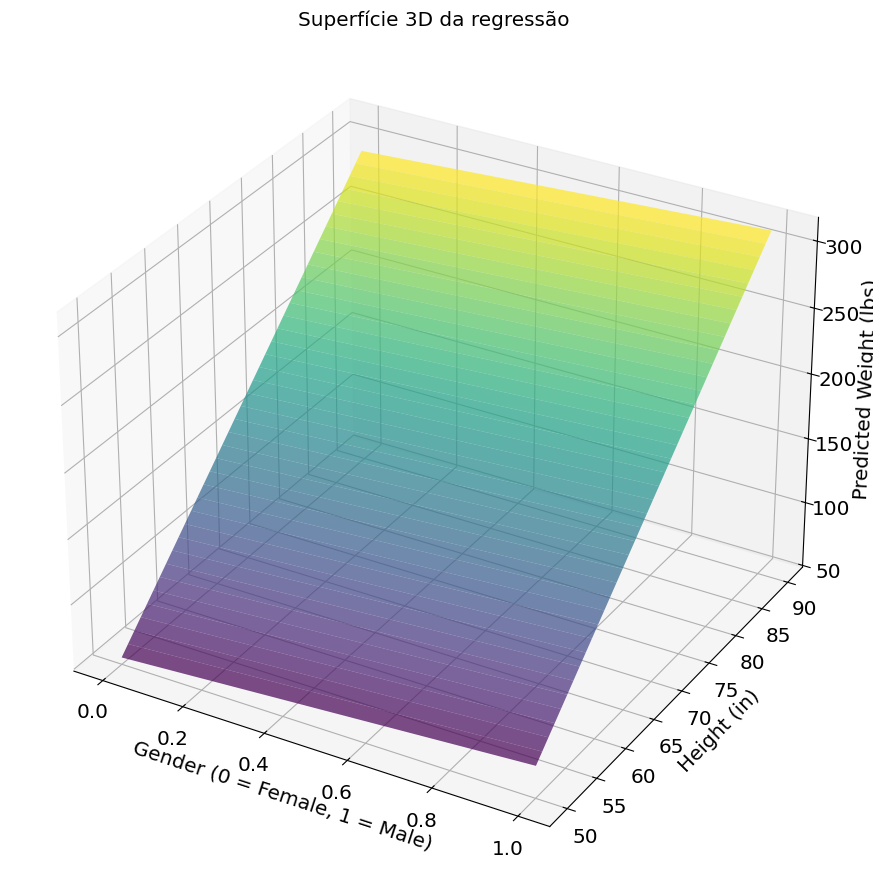

In [126]:
# Criando um grid para os valores
gender_range = np.linspace(0, 1, 2)  # 0 = Female, 1 = Male
height_range = np.linspace(50, 90, 40)
gender_grid, height_grid = np.meshgrid(gender_range, height_range)
X_grid = np.column_stack((gender_grid.ravel(), height_grid.ravel()))

# Prevendo pesos para esse grid
weight_pred = reg.predict(X_grid).reshape(gender_grid.shape)

# Plotando
fig = plt.figure(figsize=(15, 11))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(gender_grid, height_grid, weight_pred, alpha=0.7, cmap='viridis')
ax.set_xlabel('Gender (0 = Female, 1 = Male)')
ax.set_ylabel('Height (in)')
ax.set_zlabel('Predicted Weight (lbs)')
plt.title('Superfície 3D da regressão')
plt.show()

Ou então, plotar duas retas de regressão

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


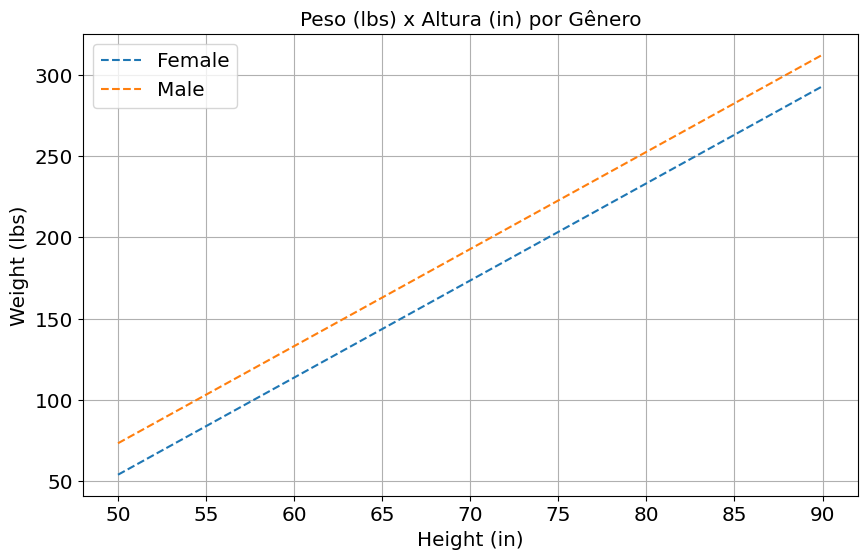

In [127]:
height_range = np.linspace(50, 90, 100)

plt.figure(figsize=(10, 6))

for gender_label in le.classes_:  # 'Male', 'Female'
    gender_encoded = le.transform([gender_label])[0]
    X_pred = np.column_stack((
        np.full_like(height_range, gender_encoded),
        height_range
    ))
    weight_pred = reg.predict(X_pred)

    plt.plot(height_range, weight_pred, label=f'{gender_label}', linestyle='--')

plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.title('Peso (lbs) x Altura (in) por Gênero')
plt.legend()
plt.grid(True)
plt.show()

## 5. Computing Evaluation Metrics

How much do the predictions obtained differ from the actual data?

### Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

$$ MAE = \frac{1}{m}\sum_{i=1}^{m}|y^{(i)} - \hat{y}^{(i)}| $$

In [128]:
from sklearn.metrics import mean_absolute_error

In [129]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

7.962168764049688

### Mean Squared Error (MSE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 $$

Since the **errors** are squared before computing the _mean_, MSE weights **large errors** more than the MAE.

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
MSE = mean_squared_error(y_test, y_pred)
MSE

101.24427647013303

## Root Mean Squared Error (RMSE)
Square root of the MSE. <br/>
This is the metric commonly used to compare regression models.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [132]:
from sklearn.metrics import root_mean_squared_error

In [133]:
RMSE_manually = np.sqrt(MSE)
RMSE_manually

np.float64(10.062021490244048)

In [134]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

10.062021490244048

##R2

In [135]:
reg.score(X_test, y_test)

0.9033321846361925

In [136]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9033321846361925


# Conclusão

Considerando a variável gênero, foi possível obter alguns ganhos no que se refere à acurácia do modelo:

*   Aumento de 0.04560040693 no valor de R2
*   Diminuição de 1.729765038 no MAE
*   Diminuição de 2.144677662 no RMSE
*   Diminuição de 47.75922771 no MSE